In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
data = pd.read_csv('covid_dataset/us-covid19/us_total.csv')
data.head(2)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,USA,North America,United States,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.0,0.0,0.0
1,USA,North America,United States,2020-01-23,1.0,0.0,0.0,0.0,0.0,0.0,...,19.1,24.6,0.0,2.77,78.86,0.926,0.0,0.0,0.0,0.0


In [150]:
data = data.drop(['iso_code', 'continent', 'reproduction_rate', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',        'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'], axis=1)
data.head(2)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,hosp_patients_per_million,total_tests,new_tests,new_tests_smoothed,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed
0,United States,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,United States,2020-01-23,1.0,0.0,0.0,0.0,0.0,0.0,0.003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
data.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'icu_patients', 'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'total_tests', 'new_tests',
       'new_tests_smoothed', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'new_vaccinations_smoothed'],
      dtype='object')

In [152]:
daily_new_case = data.loc[0:,'new_cases_smoothed'].values
daily_new_death = data.loc[0:,'new_deaths_smoothed'].values
daily_hosp = data.loc[0:,'hosp_patients'].values
dates = data.loc[0:,'date'].values

<function matplotlib.pyplot.show(close=None, block=None)>

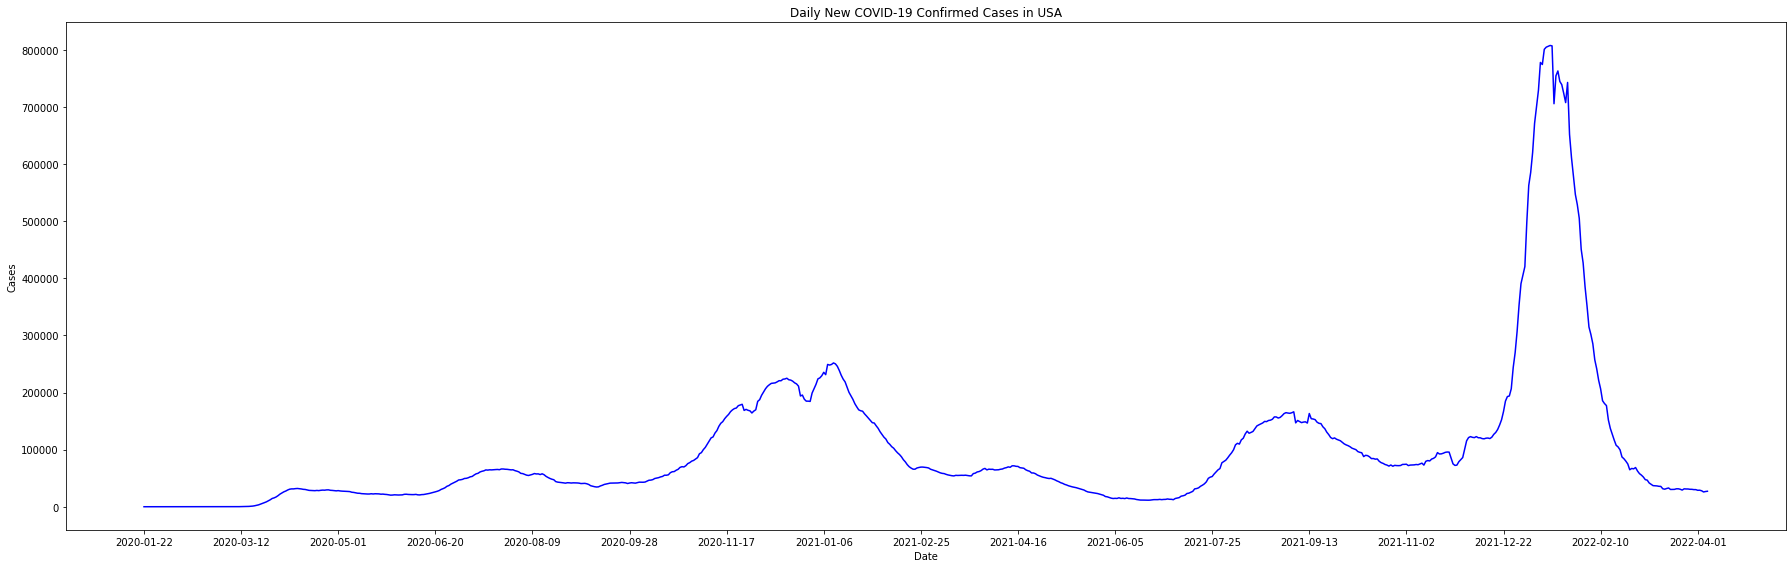

In [153]:
plt.figure(figsize=(25,8))
plt.plot(dates,daily_new_case, color='b', )
plt.xticks(np.arange(0, len(dates)+1, 50))
plt.title('Daily New COVID-19 Confirmed Cases in USA')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.tight_layout()
plt.savefig('figures/US_daily_cases.pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

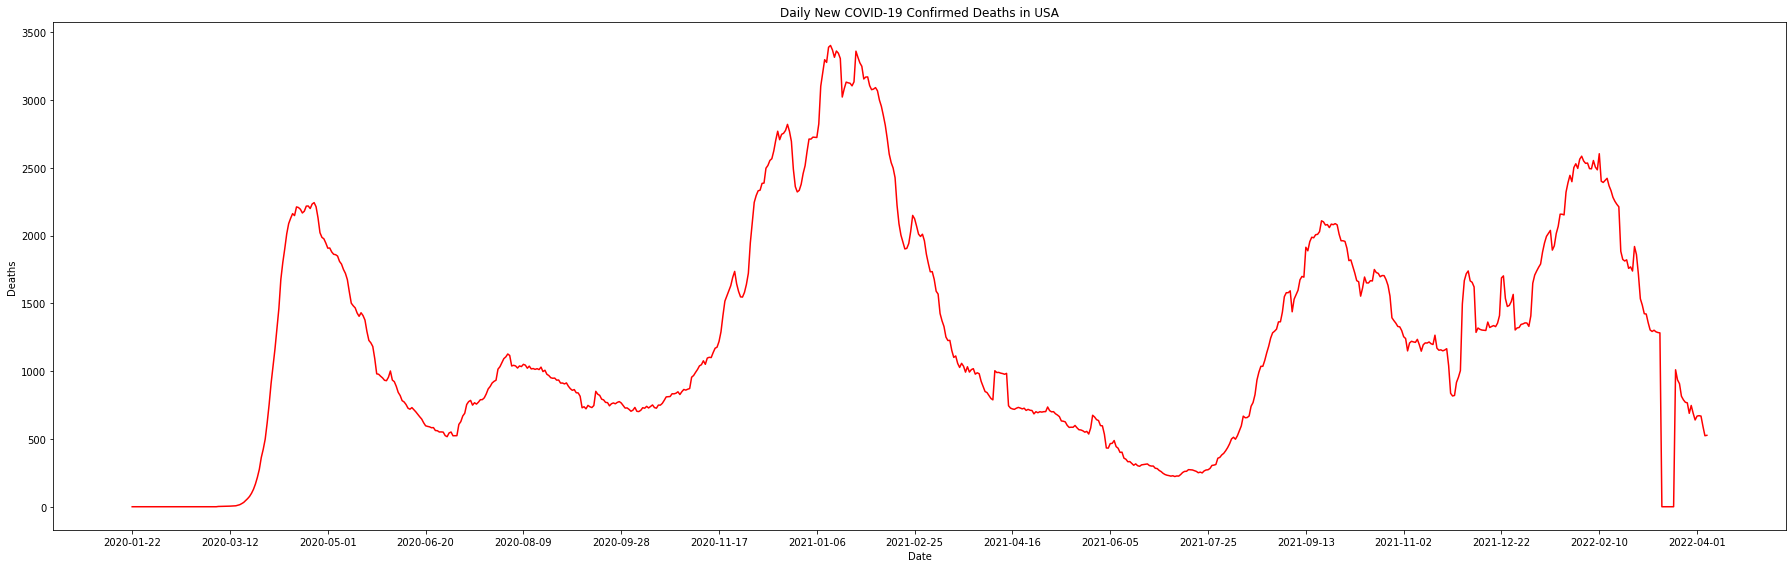

In [154]:
plt.figure(figsize=(25,8))
plt.plot(dates,daily_new_death, color='r', )
plt.xticks(np.arange(0, len(dates)+1, 50))
plt.title('Daily New COVID-19 Confirmed Deaths in USA')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.tight_layout()
plt.savefig('figures/US_daily_deaths.pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

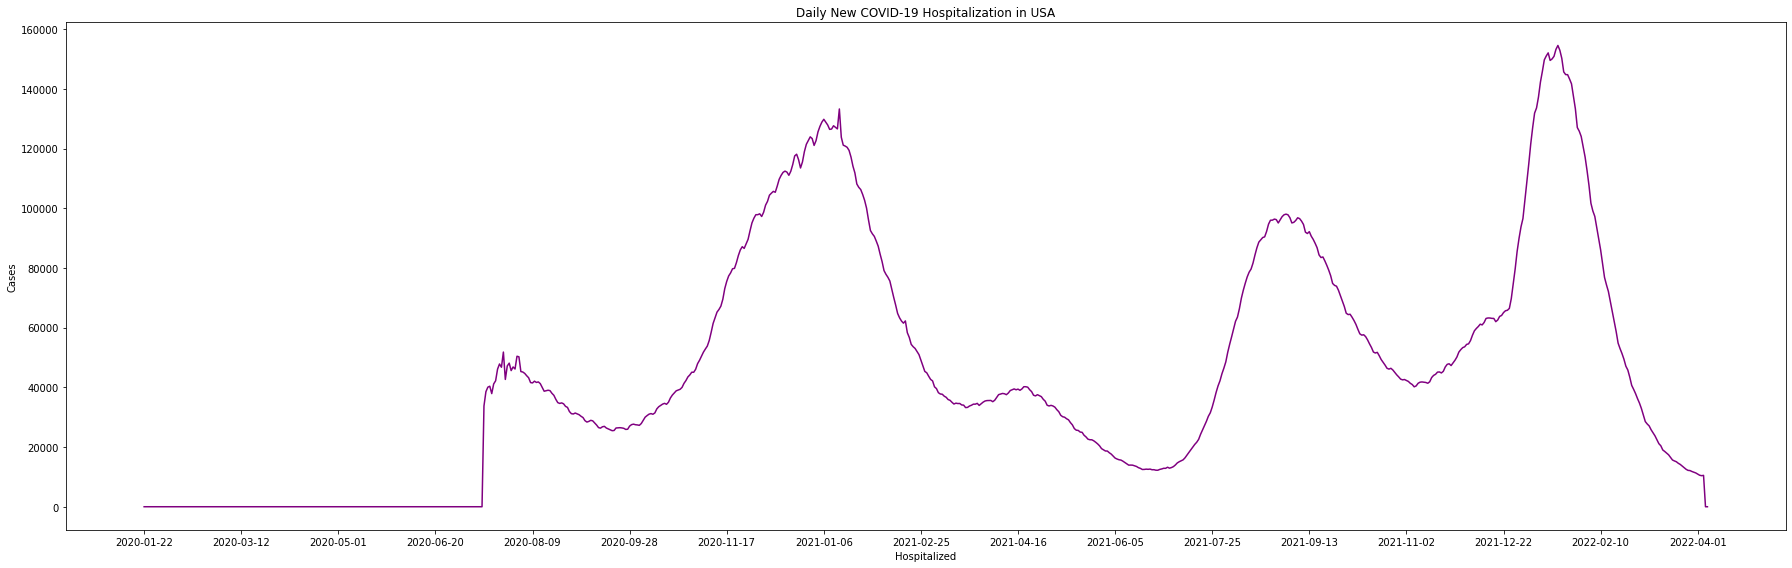

In [155]:
plt.figure(figsize=(25,8))
plt.plot(dates,daily_hosp, color='purple', )
plt.title('Daily New COVID-19 Hospitalization in USA')
plt.xticks(np.arange(0, len(dates)+1, 50))
plt.xlabel('Hospitalized')
plt.ylabel('Cases')
plt.tight_layout()
plt.savefig('figures/US_daily_hospitalization.pdf')
plt.show

In [156]:
total_case = data.loc[0:,'total_cases'].values
total_death = data.loc[0:,'total_deaths'].values

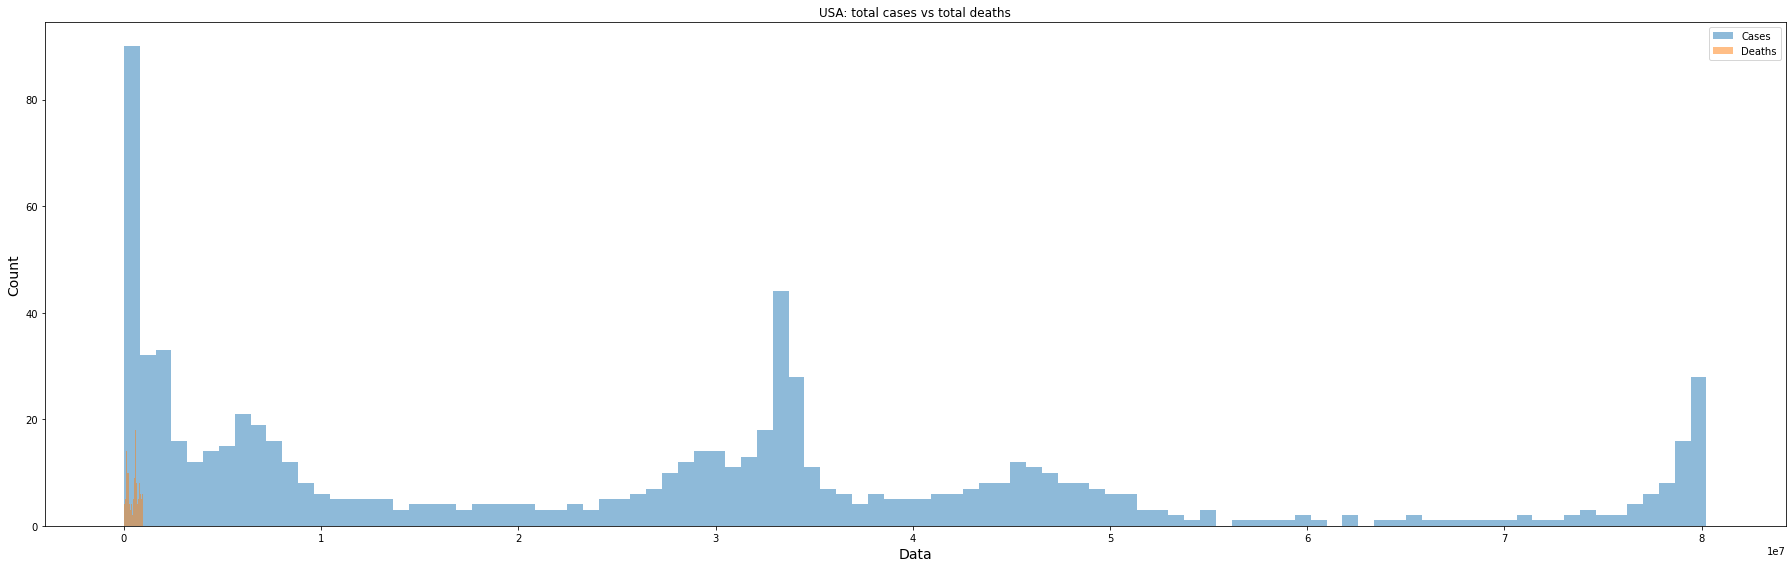

In [157]:
plt.figure(figsize=(25,8))
plt.hist(total_case, bins=100, alpha=0.5, label="Cases")
plt.hist(total_death, bins=100, alpha=0.5, label="Deaths")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("USA: total cases vs total deaths")
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figures/USA total cases vs total deaths.pdf')
plt.show()